In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#using death.json file
def lives_vs_daysSurvived(fileName, team):
  if not isinstance(team,str):
    print("Error: Team variable should be a string!")

  dataFrame = pd.read_json(fileName, lines = True)
  teamData = dataFrame[dataFrame["agent_type"].str.contains(team)] #extract data for a certain team
  ages = teamData["ageUponDeath"].values #convert into numpy
  #ages = teamData["Age"].values #convert into numpy
  deaths = np.arange(len(ages)) + 1
  return deaths, ages 

#using .csv file
def cumulativeRewards(fileName):
  data = pd.read_csv(fileName).to_numpy()
  day = np.arange(data.size) + 1
  return day, data

#using the 'foodtaken_vs_hp.csv' file
#output the foodtaken distribution vs hp to a .csv file
def foodtakenDistributionVsHp(fileName, actionLevels, interval):
  data = pd.read_csv(fileName).to_numpy()
  distribution = {}
  foodtaken = data[:,0]
  hp = data[:,1]
  table = []
  
  for element in hp:
    distribution[element] = np.zeros(actionLevels)

  for element in data:
    position = int(element[0]/interval)
    distribution[element[1]][position] += 1

  for key in distribution:
      column = distribution[key]
      column = np.insert(column,0, key)
      table.append(column)

  np.savetxt("food_distribution_vs_hp.csv", table, delimiter=',')
  
#using death.json file
def days_vs_deathPerDay(fileName, simulation_days):
  dataFrame = pd.read_json(fileName, lines = True)
  day = np.arange(simulation_days) + 1
  deathPerDay = np.zeros(simulation_days)

  value_count = dataFrame["ageUponDeath"].value_counts()
  for n in range(simulation_days):
    if n+1 in value_count:
      deathPerDay[n] = value_count[n+1]
  
  return day, deathPerDay

#create the states for Q and Policy table
def generateStates():
  hpDim = 10
  plaformFoodDim = 10
  criticalDaysDim = 5
  table = []
  for hp in np.arange(0,hpDim):
    for platformFood in np.arange(0,plaformFoodDim):
      for criticalDays in np.arange(0,criticalDaysDim):
        table.append([hp,platformFood,criticalDays])
  np.savetxt("csv_files/states.csv",delimiter=',')


  

In [10]:
#create the states for Q and Policy table
generateStates()

TypeError: _savetxt_dispatcher() missing 1 required positional argument: 'X'

6


Text(0.5, 1.0, 'Deaths vs Days lived')

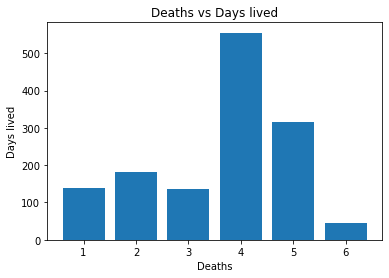

In [18]:
#plot lives vs days lived
fileName = "logs/2022-01-10-21-47-51/death.json"
team = "Team6"
lives, days_survived = lives_vs_daysSurvived(fileName, team)
print(len(lives))

plt.bar(lives, days_survived, tick_label = lives)
plt.xlabel("Deaths")
plt.ylabel("Days lived")
plt.title("Death number vs Days lived")

In [ ]:
#Days vs death per day
day, deathPerDay = days_vs_deathPerDay(fileName, 10000)
#x = day[range(0,200,10)]
#y = deathPerDay[range(0,200,10)]

plt.bar(day,deathPerDay)
plt.xlabel("Days")
plt.ylabel("Death Per Day")
plt.title("Days vs Death per day")

# Read from .csv

Text(0.5, 1.0, 'hp vs days')

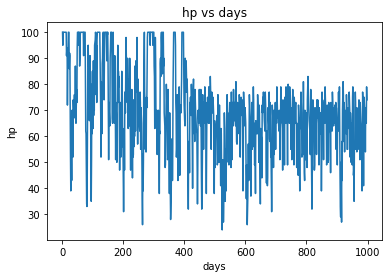

In [15]:
#hp vs days
fileName = "HP_by_days_dc2870bd-3431-48c1-bb76-912d30e09074.csv"
hp = pd.read_csv(fileName).to_numpy()
days = np.arange(hp.size)+1
plt.plot(days, hp)
plt.xlabel("days")
plt.ylabel("hp")
plt.title("hp vs days")



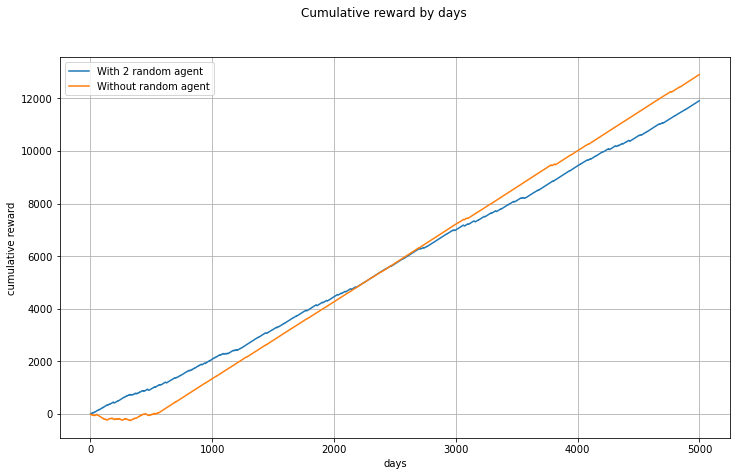

In [23]:
#cumulative rewards
fileName = "log_plot/2022-01-12-20-10-47_A1_R2_W5_02_5000/cumulative_rewards_68bcb671-1d10-45f3-b249-c0c6fa0ca1ef.csv"
day, data = cumulativeRewards(fileName)
fileName = "log_plot/2022-01-12-10-53-09_A1_R0_W5_02_5000/cumulative_rewards_76941a7a-7281-4913-8238-c50541e3384c.csv"
day, data2 = cumulativeRewards(fileName)

#fileName = "log_plot/2022-01-12-11-29-47_A3_R0_W5_01_5000/cumulative_rewards_5bd552be-e7cb-4053-bf9c-06a1d0998dc5.csv"
#day, data3 = cumulativeRewards(fileName)
#fileName = "log_plot/2022-01-12-11-47-22_A18_R0_W5_01_5000/cumulative_rewards_1de4cef5-6742-453c-828c-1a4f839da7c0.csv"
#day, data4 = cumulativeRewards(fileName)

fig = plt.figure(figsize=(12, 7))
plt.plot(day,data, label='With 2 random agent')
plt.plot(day,data2, label='Without random agent')

#plt.plot(day,data3, label='3 Team2 agent')
#plt.plot(day,data4, label='18 Team2 agent')

plt.legend()
fig.suptitle('Cumulative reward by days')
plt.xlabel('days')
plt.ylabel('cumulative reward')
plt.grid()

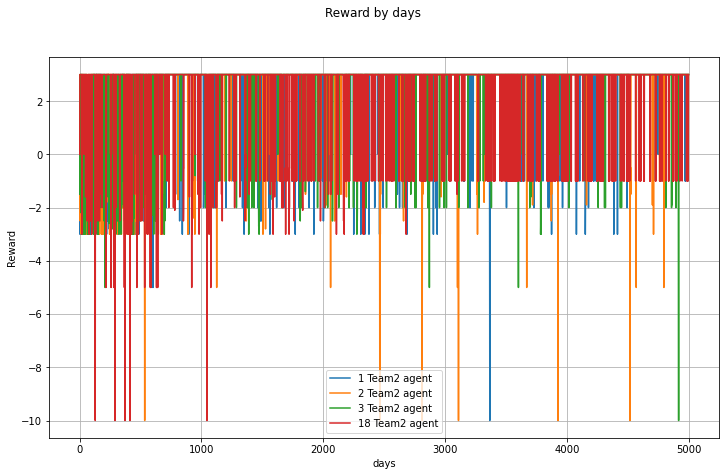

In [32]:
# rewards per day
fileName = "log_plot/2022-01-12-10-02-32_A1_R0_W5_01_5000/reward_vs_days_7d10d226-27b1-418b-97bf-cd15fa4e1208.csv"
day, data = cumulativeRewards(fileName)
fileName = "log_plot/2022-01-12-10-31-59_A2_R0_W5_01_5000/reward_vs_days_84023f55-3b6b-48f2-aaf5-3d3eadfd5100.csv"
day, data2 = cumulativeRewards(fileName)

fileName = "log_plot/2022-01-12-11-29-47_A3_R0_W5_01_5000/reward_vs_days_5bd552be-e7cb-4053-bf9c-06a1d0998dc5.csv"
day, data3 = cumulativeRewards(fileName)
fileName = "log_plot/2022-01-12-11-47-22_A18_R0_W5_01_5000/reward_vs_days_1de4cef5-6742-453c-828c-1a4f839da7c0.csv"
day, data4 = cumulativeRewards(fileName)

fig = plt.figure(figsize=(12, 7))
plt.plot(day,data, label='1 Team2 agent')
plt.plot(day,data2, label='2 Team2 agent')

plt.plot(day,data3, label='3 Team2 agent')
plt.plot(day,data4, label='18 Team2 agent')

plt.legend(loc='lower center')
fig.suptitle('Reward by days')
plt.xlabel('days')
plt.ylabel('Reward')
plt.grid()

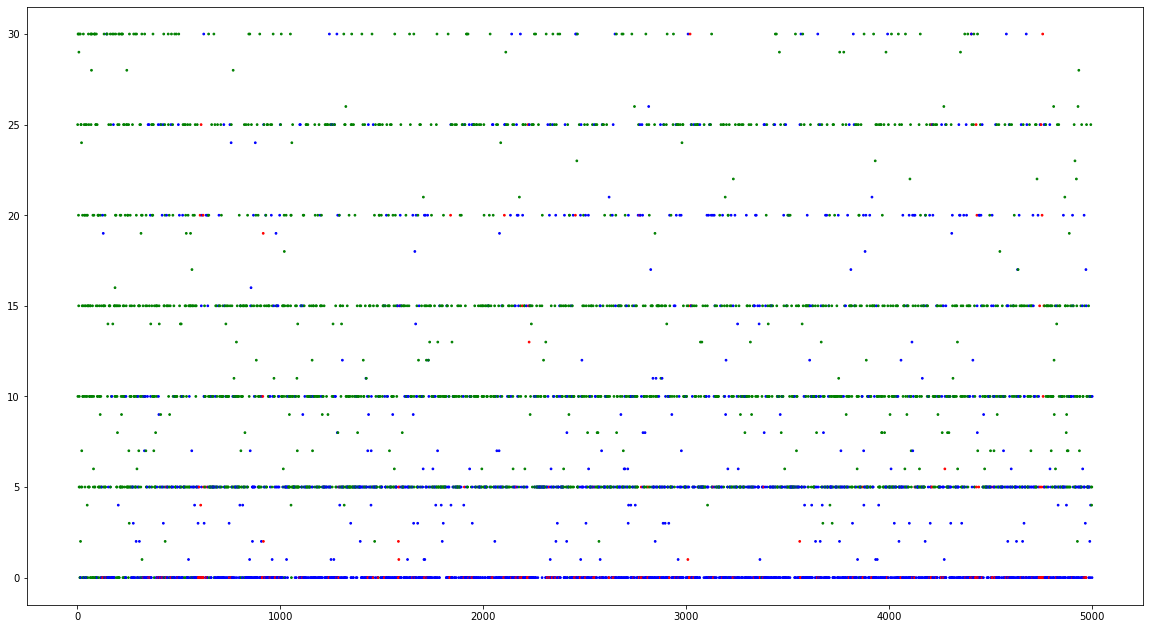

In [3]:
# FoodEaten vs days (hp sorted with three levels)
#use the 'foodtaken_vs_hp.csv' file
import csv

with open('log_plot/2022-01-12-10-02-32_A1_R0_W5_5000/foodtaken_vs_hp_7d10d226-27b1-418b-97bf-cd15fa4e1208.csv', newline='') as f:
    reader = csv.reader(f)
    foodAndHp = list(reader)

days = list(range(1, len(foodAndHp)+1))
foodEaten = [float(x[0]) for x in foodAndHp]
Hp = [float(x[1]) for x in foodAndHp]

def sortHpNumber(n):
    if n < 34:
        return 0
    elif n < 67:
        return 1
    else:
        return 2
HpSortedNumber = list(map(sortHpNumber,Hp))

#plt.scatter(days, foodEaten,s=10,c=HpSorted,cmap='Greens')
#plt.scatter(days, foodEaten,s=10,c=HpSorted,cmap='PuBuGn')
"""
colors=["#0000FF", "#00FF00", "#FF0066"]
for i in range(len(days)):
    plt.scatter(days[i], foodEaten[i], color=colors[HpSorted[i]])
"""
def sortHp(n):
    if n < 34:
        return "red"
    elif n < 67:
        return "blue"
    else:
        return "green"
sequence_of_colors = list(map(sortHp,Hp))
plt.figure(figsize=(20, 11))
plt.scatter(days, foodEaten,s=3,c=sequence_of_colors)

#left, right = 1,5000        # return the current xlim
#plt.xlim((left, right))     # set the xlim to left, right

plt.show()

#export to .csv file to plot the histogram
tableN = []
tableN.append(days)
tableN.append(foodEaten)
tableN.append(HpSortedNumber)
TransposeData = pd.DataFrame(data=tableN)
TransposeData1 = TransposeData.T
np.savetxt("foodEatenVSdays.csv", TransposeData1, delimiter=',')

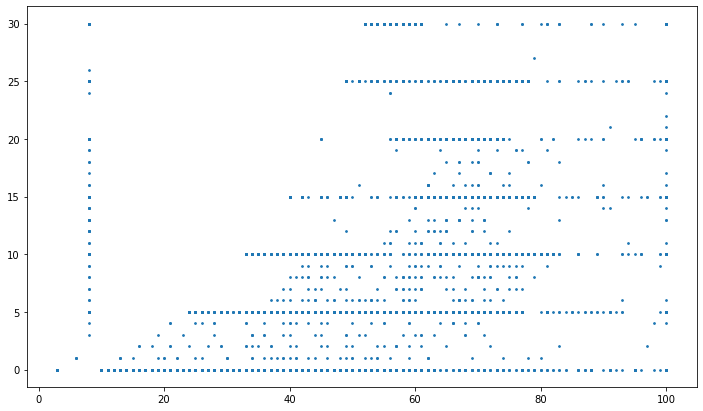

In [12]:
# foodEaten vs hp 
import csv

with open('log_plot/2022-01-11-20-21-11_A1_R2_W15_10000/foodtaken_vs_hp_bd6fb28c-2802-44e6-8b2d-d2da4624c024.csv', newline='') as f:
    reader = csv.reader(f)
    foodAndHp = list(reader)

days = list(range(1, len(foodAndHp)+1))
foodEaten = [float(x[0]) for x in foodAndHp]
Hp = [float(x[1]) for x in foodAndHp]

plt.figure(figsize=(12, 7))
plt.scatter(Hp, foodEaten,s=3)

#left, right = 1,100        # return the current xlim
#plt.xlim((left, right))     # set the xlim to left, right

plt.show()

In [14]:
# foodtakenDistributionVsHp
#use the 'foodtaken_vs_hp.csv' file
#the output is another csv file
fileName = "log_plot/2022-01-11-19-29-21_A1_R0_10000/foodtaken_vs_hp_ab3b859c-f81c-4f88-b06b-214ef941298a.csv"
foodtakenDistributionVsHp(fileName, 7, 5)

# Read from json

In [54]:
# Use death instead

#td = pd.read_json("log_plot/2022-01-12-23-59-05_A1_R0_W5_02_10000_RN/death.json", lines = True)
td = pd.read_json("log_plot/2022-01-12-23-34-14_A1_R0_W5_02_10000/death.json", lines = True)

#td2 = pd.read_json("log_plot/2022-01-12-23-34-14_A1_R0_W5_02_10000/death.json", lines = True)
td2 = pd.read_json("log_plot/2022-01-13-00-51-11_A18_R0_W5_02_10000/death.json", lines = True)

print(td.columns)

Index(['ageUponDeath', 'agent_type', 'cumulativeDeaths', 'day', 'level', 'msg',
       'tick', 'time'],
      dtype='object')


In [3]:
fig = plt.figure(figsize=(12, 7))
plt.plot(day,data, label='With 2 random agent')
plt.plot(day,data2, label='Without random agent')

#plt.plot(day,data3, label='3 Team2 agent')
#plt.plot(day,data4, label='18 Team2 agent')

plt.legend(loc='lower center')
fig.suptitle('Reward by days')
plt.xlabel('days')
plt.ylabel('cumulative reward')
plt.grid()

NameError: name 'day' is not defined

<Figure size 864x504 with 0 Axes>

'\nfig = plt.figure()\nax = fig.add_axes([0,0,1,1])\na_list = list(range(1, max(len(plotdata),len(plotdata2)+2)))\n#a_list = np.arange(max(len(plotdata),len(plotdata2)+2)\n#print(plotdata[\'ageUponDeath\'])\nax.bar(a_list+0.00,plotdata[\'ageUponDeath\'],width = 0.25,label = "without reincarnation")\nplt.bar(a_list+0.25,plotdata2[\'ageUponDeath\'],width = 0.25,label = "with reincarnation")\nplt.legend(loc=\'best\')\nfig.suptitle(\'Survive days by generation\')\nplt.xlabel(\'generation\')\nplt.ylabel(\'survive days\')\n#plt.grid()\n'

<Figure size 864x504 with 0 Axes>

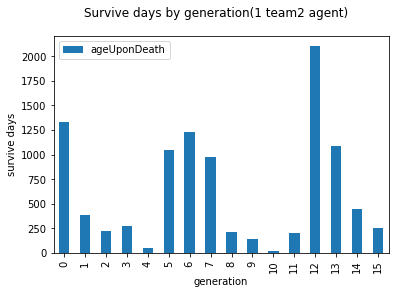

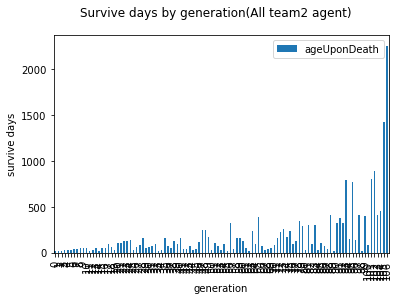

In [58]:
# Team2 agent - survive days per generation
fig = plt.figure(figsize=(12, 7))

t_all = td.loc[td['agent_type'] == "Team2"]
plotdata = pd.DataFrame(t_all, columns = ['ageUponDeath'])

sum_day_lived = plotdata['ageUponDeath'].sum()
remain = 10000 - sum_day_lived
plotdata.at[-1]=remain

plotdata.reset_index(inplace=True)
plotdata = pd.DataFrame(plotdata, columns = ['ageUponDeath'])
plotdata.plot(kind='bar')
plt.legend(loc='best')
#plt.suptitle('Survive days by generation(without reincarnation)')
plt.suptitle('Survive days by generation(1 team2 agent)')
plt.xlabel('generation')
plt.ylabel('survive days')
#plt.grid()

t_all2 = td2.loc[td2['agent_type'] == "Team2"]
plotdata2 = pd.DataFrame(t_all2, columns = ['ageUponDeath'])

sum_day_lived = plotdata2['ageUponDeath'].sum()
#remain = 10000 - sum_day_lived
#plotdata2.at[-1]=remain

plotdata2.reset_index(inplace=True)
plotdata2 = pd.DataFrame(plotdata2, columns = ['ageUponDeath'])

plotdata2.plot(kind='bar')

plt.legend(loc='best')
#plt.suptitle('Survive days by generation(without reincarnation)')
plt.suptitle('Survive days by generation(All team2 agent)')
plt.xlabel('generation')
plt.ylabel('survive days')
#plt.grid()

"""
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
a_list = list(range(1, max(len(plotdata),len(plotdata2)+2)))
#a_list = np.arange(max(len(plotdata),len(plotdata2)+2)
#print(plotdata['ageUponDeath'])
ax.bar(a_list+0.00,plotdata['ageUponDeath'],width = 0.25,label = "without reincarnation")
plt.bar(a_list+0.25,plotdata2['ageUponDeath'],width = 0.25,label = "with reincarnation")
plt.legend(loc='best')
fig.suptitle('Survive days by generation')
plt.xlabel('generation')
plt.ylabel('survive days')
#plt.grid()
"""

In [39]:
#plotdata = pd.DataFrame(t_all, columns = ['ageUponDeath'])
#plotdata.reset_index(inplace=True)
#plotdata = pd.DataFrame(plotdata, columns = ['ageUponDeath'])
mean_day_lived = plotdata['ageUponDeath'].mean()
plotdata = plotdata['ageUponDeath']/mean_day_lived
plotdata.plot(x='index',kind='bar')

plt.legend(loc='best')
plt.suptitle('Survive days by generation(without reincarnation)')
plt.xlabel('generation')
plt.ylabel('survive days/average survive days')
plt.grid()


KeyError: 'ageUponDeath'

<AxesSubplot:>

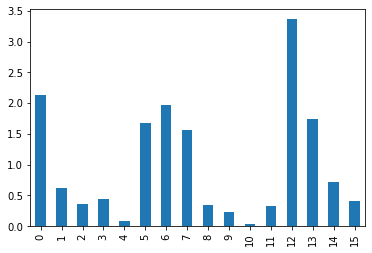

In [68]:

mean_day_lived2 = plotdata2['ageUponDeath'].mean()
plotdata2 = plotdata2['ageUponDeath']/mean_day_lived2
plotdata2.plot(x='index',kind='bar')
plt.legend(loc='best')
plt.suptitle('Survive days by generation(with reincarnation)')
plt.xlabel('generation')
plt.ylabel('survive days')
plt.grid()

Text(0, 0.5, 'days')

<Figure size 864x504 with 0 Axes>

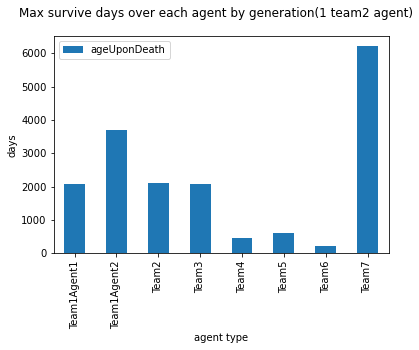

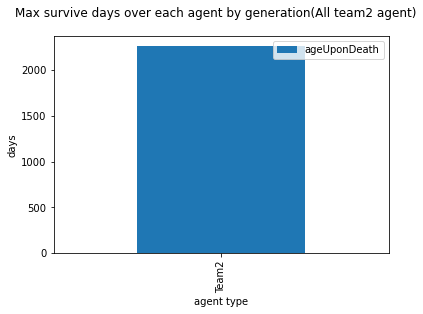

In [59]:
# max survive days over each agent
fig = plt.figure(figsize=(12, 7))

t_all = td
plotdata = pd.DataFrame(t_all, columns = ['agent_type','ageUponDeath'])
idx = plotdata.groupby(['agent_type'])['ageUponDeath'].transform(max) == plotdata['ageUponDeath']
PD = plotdata[idx]
PD = PD.sort_values(by=['agent_type'])
PD.plot(x='agent_type',y='ageUponDeath',kind='bar')

#fig = plt.figure(figsize=(12, 7))
plt.legend(loc='best')
#plt.suptitle('Max survive days over each agent by generation(without reincarnation)')
plt.suptitle('Max survive days over each agent by generation(1 team2 agent)')
plt.xlabel('agent type')
plt.ylabel('days')
#plt.grid()

t_all2 = td2
plotdata2 = pd.DataFrame(t_all2, columns = ['agent_type','ageUponDeath'])
idx2 = plotdata2.groupby(['agent_type'])['ageUponDeath'].transform(max) == plotdata2['ageUponDeath']
PD2 = plotdata2[idx2]
PD2 = PD2.sort_values(by=['agent_type'])
PD2.plot(x='agent_type',kind='bar')

plt.legend(loc='best')
#plt.suptitle('Max survive days over each agent by generation(with reincarnation)')
plt.suptitle('Max survive days over each agent by generation(All team2 agent)')
plt.xlabel('agent type')
plt.ylabel('days')

Text(0, 0.5, 'days')

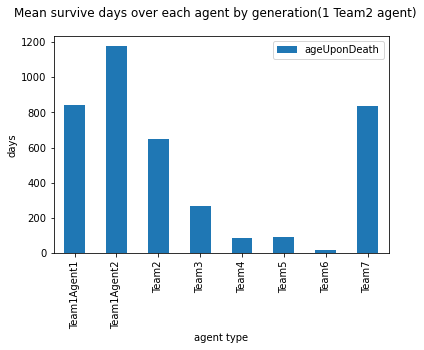

In [60]:
# mean day survive per agent
t_all = td
plotdata = pd.DataFrame(t_all, columns = ['agent_type','ageUponDeath'])
A_sorted = plotdata.sort_values(["agent_type"], ascending=True)
A_sorted = A_sorted.groupby(['agent_type'])['ageUponDeath'].mean()
#PD = plotdata[idx]
#plotdata
fig = plt.figure()
A_sorted.plot(x='agent_type',kind='bar')


plt.legend(loc='best')
#plt.suptitle('Mean survive days over each agent by generation(without reincarnation)')
plt.suptitle('Mean survive days over each agent by generation(1 Team2 agent)')
plt.xlabel('agent type')
plt.ylabel('days')

Text(0, 0.5, 'days')

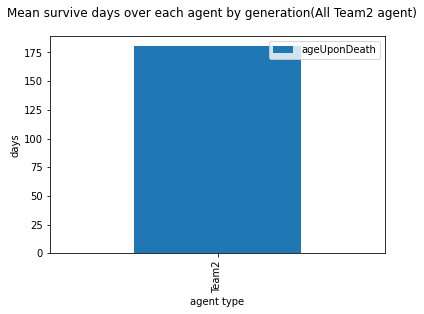

In [61]:
t_all2 = td2
plotdata2 = pd.DataFrame(t_all2, columns = ['agent_type','ageUponDeath'])
A_sorted2 = plotdata2.sort_values(["agent_type"], ascending=True)
A_sorted2 = A_sorted2.groupby(['agent_type'])['ageUponDeath'].mean()
#PD = plotdata[idx]
#plotdata
fig = plt.figure()
A_sorted2.plot(x='agent_type',kind='bar')

plt.legend(loc='best')
#plt.suptitle('Mean survive days over each agent by generation(with reincarnation)')
plt.suptitle('Mean survive days over each agent by generation(All Team2 agent)')
plt.xlabel('agent type')
plt.ylabel('days')